This is a notebook for checking if the user has provided the info or not

# Importing Libraries

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

import xgboost as xgb
from xgboost import XGBClassifier

import os
import sys
import joblib

# Importing Data

In [6]:
data=pd.read_csv('/content/drive/MyDrive/Formless AI/Info Given or not given - Sheet1.csv')
data.head()

,User input,Provided
0,Why do you need my date of birth?,No
1,I'm not comfortable sharing my birthdate,No
2,Can I skip providing my birthdate?,No
3,Is my birthdate safe with you?,No
4,Why is my birthdate necessary?,No


Here are two columns that goes like this user input and provided where the user input shows the input given by the user to the bot<br>
Provided column means that if the user has provided the info or Not

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User input  240 non-null    object
 1   Provided    240 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


In [8]:
#checking for null values if any
data.isnull().sum()

User input    0
Provided      0
dtype: int64

There are no null values in our data

In [9]:
#value counts in provided column
data['Provided'].value_counts()

No     120
Yes    120
Name: Provided, dtype: int64

All things balanced as it should be- Thanos

# Splitting the Data

In [10]:
features=data['User input']
labels=data['Provided']

In [11]:
X_train, X_test , y_train, y_test = train_test_split(features,labels,test_size=0.2,random_state=123,stratify=labels)

# TF-IDF

In [14]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

# Random Forest

In [15]:
classifier = RandomForestClassifier()
classifier.fit(tfidf_train_vectors,y_train)

RandomForestClassifier()

In [16]:
y_pred = classifier.predict(tfidf_test_vectors)

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.83      1.00      0.91        24
         Yes       1.00      0.79      0.88        24

    accuracy                           0.90        48
   macro avg       0.91      0.90      0.89        48
weighted avg       0.91      0.90      0.89        48



Making a confusion matrix

<Axes: >

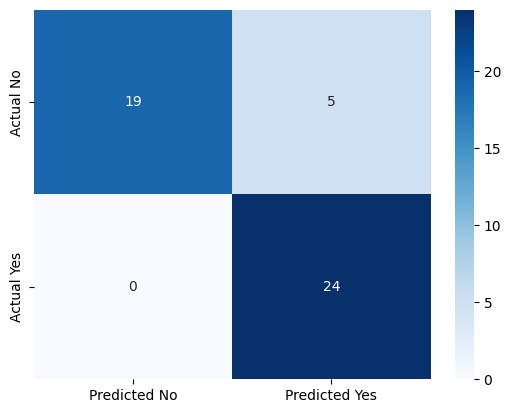

In [20]:
cm = confusion_matrix(y_test, y_pred, labels=["Yes","No"])

# Display the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted No", "Predicted Yes"],
            yticklabels=["Actual No", "Actual Yes"])

Saving this classifier

In [28]:
model_filename = '/content/drive/MyDrive/Formless AI/smart_contract_rfm.joblib'
joblib.dump(classifier, model_filename)

['/content/drive/MyDrive/Formless AI/smart_contract_rfm.joblib']

# XGB classifier

In [22]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the label encoder on y_train
y_train_encoded = label_encoder.fit_transform(y_train)

In [23]:
model = XGBClassifier()
model.fit(tfidf_train_vectors,y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [24]:
y_pred = model.predict(tfidf_test_vectors)

In [25]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the label encoder on y_train
y_test_encoded = label_encoder.fit_transform(y_test)

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        24
           1       0.90      0.79      0.84        24

    accuracy                           0.85        48
   macro avg       0.86      0.85      0.85        48
weighted avg       0.86      0.85      0.85        48

